In [1]:
### This notebook identifies the low coverage genes in noncoding region in file
# Author: Yiyun
import pandas as pd
import os
from multiprocessing import Pool
import sys
from tqdm import tqdm, tqdm_pandas,tqdm_notebook
import pickle
import numpy as np

In [5]:
### Transcript info and name dict
dict_transcript_info = pickle.load(open('../anno_ref/proc_refs/dict_transcript_info.pkl','rb'))
dict_name = pickle.load(open('../anno_ref/proc_refs/dict_name_062121.pkl','rb'))

#Transcript - [exon/ncd length ration, noncoding length]
dict_transcript_ncdlen = {}
for transcripts in dict_transcript_info:
    length = dict_transcript_info[transcripts]['transcript']
    length = abs(length[1]-length[0])
    # get exon length
    exon_len = 0
    for x in dict_transcript_info[transcripts]['CDS']:
        exon_len += abs(x[1]-x[0])
    ncd_len = length-exon_len
    if ncd_len == 0:
        exon_ncd_ratio = 5000
    else:
        exon_ncd_ratio = exon_len/ncd_len
    dict_transcript_ncdlen[transcripts] = [exon_ncd_ratio,ncd_len]

# Gene name - [exon/ncd length ration, noncoding length]
dict_name_ncdlen = {}
for transcripts in dict_transcript_info:
    name = dict_name[transcripts]
    dict_name_ncdlen[name] = dict_transcript_ncdlen[transcripts]

In [10]:
lratio = []; llen = []
for keys in dict_name_ncdlen:
    if keys.startswith('OR'):
        lratio.append(dict_name_ncdlen[keys][0])
        llen.append(dict_name_ncdlen[keys][1])

In [27]:
dict_name_ncdlen['OR1L8']

[6.91044776119403, 134]

(array([102., 110.,  26.,   2.,   2.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   0.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   4.,   1.,
          2.,   0.,   0.,   1.,   0.,   1.,   0.,   1.,  24.,  80.,  16.,
          8.,   3.,   6.,   2.,   0.,   2.]),
 array([5.74341964e-03, 7.39896188e+00, 1.47921803e+01, 2.21853988e+01,
        2.95786173e+01, 3.69718357e+01, 4.43650542e+01, 5.17582727e+01,
        5.91514911e+01, 6.65447096e+01, 7.39379281e+01, 8.13311465e+01,
        8.87243650e+01, 9.61175835e+01, 1.03510802e+02, 1.10904020e+02,
        1.18297239e+02, 1.25690457e+02, 1.33083676e+02, 1.40476894e+02,
        1.47870113e+02, 1.55263331e+02, 1.62656550e+02, 1.70049768e+02,
        1.77442987e+02, 1.84836205e+02, 1.92229424e+02, 1.99622642e+02,
        2.07015860e+02, 2.14409079e+02, 2.21802297e+02, 2.29195516e+02,
        2.36588734e+02, 2.43981953e+02, 2.51375171e+02, 2.58768390e+02,
        2.

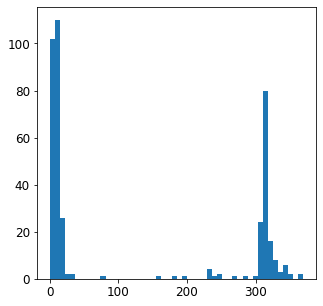

In [18]:
plt.hist(lratio, bins = 50)

(array([372.,   5.,   3.,   2.,   2.,   1.,   1.,   0.,   2.,   1.,   1.,
          0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   2.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   1.]),
 array([3.0000000e+00, 3.2588400e+03, 6.5146800e+03, 9.7705200e+03,
        1.3026360e+04, 1.6282200e+04, 1.9538040e+04, 2.2793880e+04,
        2.6049720e+04, 2.9305560e+04, 3.2561400e+04, 3.5817240e+04,
        3.9073080e+04, 4.2328920e+04, 4.5584760e+04, 4.8840600e+04,
        5.2096440e+04, 5.5352280e+04, 5.8608120e+04, 6.1863960e+04,
        6.5119800e+04, 6.8375640e+04, 7.1631480e+04, 7.4887320e+04,
        7.8143160e+04, 8.1399000e+04, 8.4654840e+04, 8.7910680e+04,
        9.1166520e+04, 9.4422360e+04, 9.7678200e+04, 1.0093404e+05,
        1.0418988e+05, 1.0744572e+05, 1.1070156e+05, 1.1395740e+05,
        1.1721324e+05, 1.2046908e+05, 1.237249

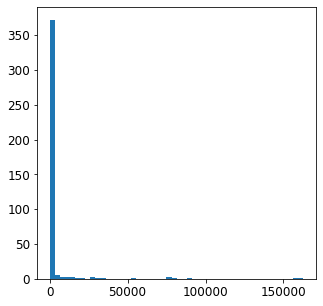

In [17]:
plt.hist(llen, bins = 50)

In [8]:
dict_name_ncdlen['OR10J1']

[7.434108527131783, 129]

In [ ]:
dict_name_ncdlen['OR1F1']

In [89]:
### Filter the genes with very small non-coding region in GRCh37
l_lowq_gene = []
for k,v in dict_name_ncdlen.items():
#     if v[1] <=3 and v[0]>10:   # The noncoding region length should be at least 100 and the exon-intron ratio should be <10
    if v[0] >=1:
        l_lowq_gene.append(k)

In [90]:
# print(f'Number of genes with ncd length <100 and exon/ncd ratio > 10is {len(set(l_lowq_gene))}')
print(f'Number of genes with ncd length <=3 is {len(set(l_lowq_gene))}')

Number of genes with ncd length <=3 is 1104


In [67]:
# pickle.dump(l_lowq_gene, open('../anno_ref/lgene_tofilter.pkl','wb'))

### Don't need coverage filter

In [54]:
### Find gene has low coverage quality -- coverage < 1/1000 length, only 1 base covered in 1000bp
# Read coverage files
dir_cov = '../cov_out/cov_cohorts_060121'
featf = os.listdir(os.path.join(dir_cov, 'histology'))
l_conflict_gene = []

def get_lowcov_gene(feat):
# for feat in featf:
    l_lowcov_gene = []
    df_cov = pd.read_csv(os.path.join(dir_cov,'histology',feat),sep = '\t')
    df_noncoding = df_cov[df_cov['zone'] == 'flank']
    df_noncoding = df_noncoding.set_index(['gene','zone','categ'])
    df_cov_sum = df_noncoding.groupby(level = 0).sum()/2
    cov_median = df_cov_sum.median(axis = 1)
    for gene, covmed in cov_median.items():
        try:
            ncdlen = dict_name_ncdlen[gene]
            if covmed<(ncdlen[1]/100):
                l_lowcov_gene.append(gene)
        except KeyError:
            l_conflict_gene.append(gene)
    return l_lowcov_gene

p = Pool(18)
res = p.map(get_lowcov_gene, featf)
p.close()
p.join()
# add the intersection of the gene
l_lowq_gene.extend(list(set.intersection(*[set(x) for x in res])))
l_lowq_gene = list(set(l_lowq_gene))

In [8]:
# Load the filtered gene list
lgene_filtered = pickle.load(open('../anno_ref/low_ncdcov_quality_genelist.pkl','rb'))

### Plot the noncoding and exon/noncoding length distribution

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (5, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large',
         'font.family':'DejaVu Sans'}
pylab.rcParams.update(params)

In [44]:
### Distribution of noncoding length and exon,noncoding length ratio
df_ncd_length = pd.DataFrame.from_dict(dict_name_ncdlen).transpose()
df_ncd_length.columns = ['exon/ncd len ratio','ncd len']
# Option: Convert the len ratio to log10 scale
df_ncd_length['transformed exon/ncd len ratio'] = np.log10(df_ncd_length['exon/ncd len ratio'])
df_ncd_length.loc[df_ncd_length['ncd len'] == 0, 'ncd len'] = 0.001
df_ncd_length['transformed ncd len'] = np.log10(df_ncd_length['ncd len'])

In [68]:
df_ncd_length.loc[l_lowq_gene, 'lowq'] = 'Filtered'
not_lowq = [i for i in df_ncd_length.index if i not in l_lowq_gene]
df_ncd_length.loc[not_lowq, 'lowq'] = 'Not filtered'
# df_ncd_length.loc[lx,'lowq'] = 'low_cov'

In [10]:
# df_ncd_length.loc[lgene_nothave_cova, 'notin_cova'] = 'notin_cova'
# in_cova = [i for i in df_ncd_length.index if i not in lgene_nothave_cova]
# df_ncd_length.loc[in_cova, 'notin_cova'] = 'in_cova'

NameError: name 'lgene_nothave_cova' is not defined

In [97]:
# df_ncd_length[(df_ncd_length['transformed ncd len'] <2) & (df_ncd_length['transformed exon/ncd len ratio'] >1)]

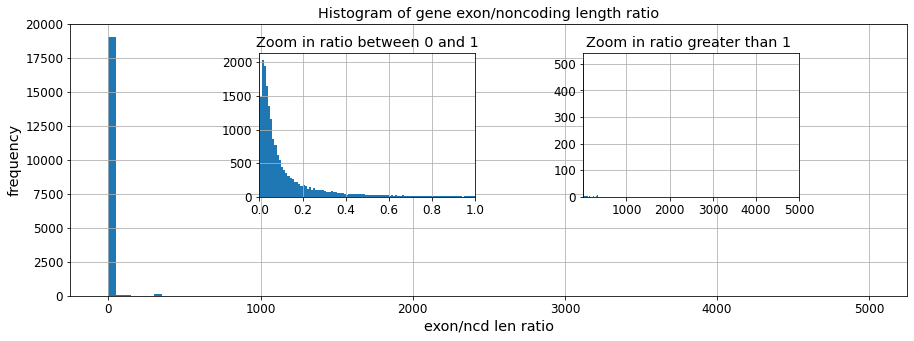

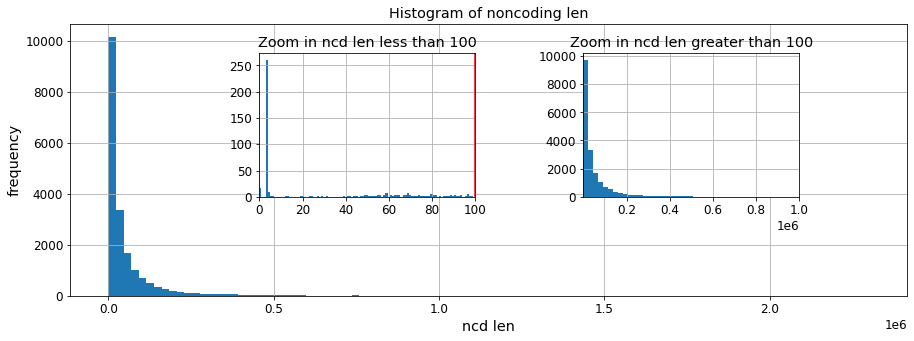

In [61]:
# Plot the distribution of len ratio
fig,axs = plt.subplots(figsize=(15,5))
axs = df_ncd_length['exon/ncd len ratio'].hist(bins=100,ax = axs)
axs.set_xlabel('exon/ncd len ratio'); axs.set_ylabel('frequency')
axs.set_title('Histogram of gene exon/noncoding length ratio')

ax = plt.axes([.3, .4, .2, .4])
ax = df_ncd_length[df_ncd_length['exon/ncd len ratio']<1]['exon/ncd len ratio'].hist(bins=100,ax = ax)
ax.set_xlim(0,1)
ax.set_title('Zoom in ratio between 0 and 1')
ax.axvline(10, color = 'red')

ax = plt.axes([.6, .4, .2, .4])
ax = df_ncd_length[df_ncd_length['exon/ncd len ratio']>1]['exon/ncd len ratio'].hist(bins=1000,ax = ax)
ax.set_xlim(1,5000)
# ax.axvline(10, color = 'red')
ax.set_title('Zoom in ratio greater than 1 ')
plt.savefig('./figure/linear_ratio')

fig,axes = plt.subplots(figsize=(15,5))
axes = df_ncd_length['ncd len'].hist(bins=100,ax = axes)
axes.set_xlabel('ncd len'); axes.set_ylabel('frequency')
axes.set_title('Histogram of noncoding len')

axs = plt.axes([.3, .4, .2, .4])
axs = df_ncd_length[df_ncd_length['ncd len']<100]['ncd len'].hist(bins=100,ax = axs)
axs.set_xlim(0,100)
axs.axvline(100, color = 'red')
axs.set_title('Zoom in ncd len less than 100')


axs = plt.axes([.6, .4, .2, .4])
axs = df_ncd_length[df_ncd_length['ncd len']>100]['ncd len'].hist(bins=100,ax = axs)
axs.set_xlim(100,1000000)
axs.axvline(100, color = 'red')
axs.set_title('Zoom in ncd len greater than 100')
plt.savefig('./figure/linear_len')


# axes[1] = df_ncd_length['ncd len'].hist(bins=100,ax = axes[1])
# axes[1].set_xlabel('ncd len'); axes[0].set_ylabel('frequency')
# axes[1].set_title('Histogram of noncoding length')
# axes[1].axvline(100, color = 'red')


Text(0.5, 1.0, 'Histogram of gene exon/noncoding length ratio')

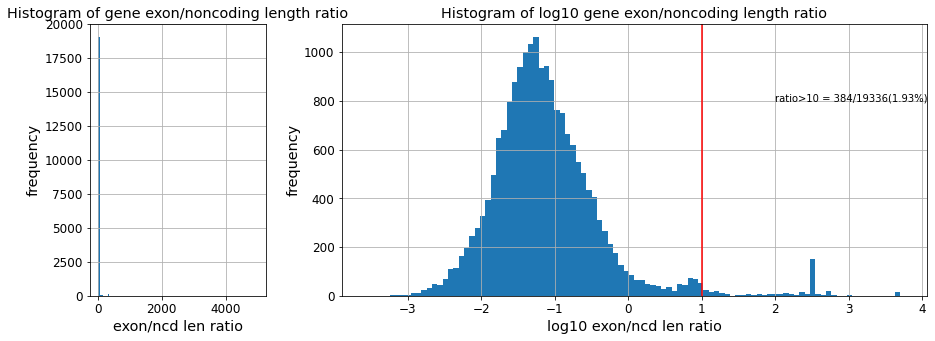

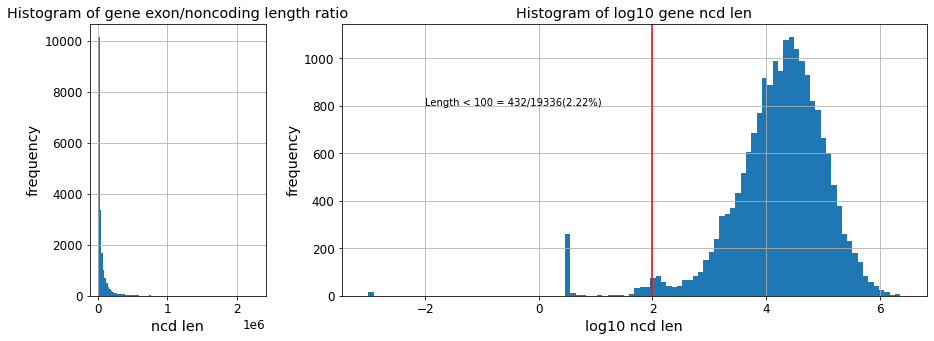

In [11]:
# Plot the distribution of len ratio
fig,axes = plt.subplots(nrows =1, ncols=2,  figsize=(15,5),gridspec_kw={'width_ratios': [3, 10]})
axes[1] = df_ncd_length['transformed exon/ncd len ratio'].hist(bins=100, ax = axes[1])
axes[1].axvline(1, color = 'red')
axes[1].set_xlabel('log10 exon/ncd len ratio'); axes[1].set_ylabel('frequency')
axes[1].set_title('Histogram of log10 gene exon/noncoding length ratio')
axes[1].text(2,800,'ratio>10 = 384/19336(1.93%)')

axes[0] = df_ncd_length['exon/ncd len ratio'].hist(bins=100,ax = axes[0])
axes[0].set_xlabel('exon/ncd len ratio'); axes[0].set_ylabel('frequency')
axes[0].set_title('Histogram of gene exon/noncoding length ratio')
# plt.savefig('./figure/ncd_ratio_histogram')

# sns.jointplot(x='exon/ncd len ratio', y='ncd len', data=df_ncd_length,kind="scatter", height=5, ratio=2)

# Plot the distribution of ncd len 
fig,axes = plt.subplots(nrows =1, ncols=2,  figsize=(15,5),gridspec_kw={'width_ratios': [3, 10]})
axes[1] = df_ncd_length['transformed ncd len'].hist(bins=100, ax = axes[1])
axes[1].axvline(2, color = 'red')
axes[1].set_xlabel('log10 ncd len'); axes[1].set_ylabel('frequency')
axes[1].set_title('Histogram of log10 gene ncd len')
axes[1].text(-2,800,'Length < 100 = 432/19336(2.22%)')

axes[0] = df_ncd_length['ncd len'].hist(bins=100,ax = axes[0])
axes[0].set_xlabel('ncd len'); axes[0].set_ylabel('frequency')
axes[0].set_title('Histogram of gene exon/noncoding length ratio')

# plt.savefig('./figure/ncd_len_histogram')

### 373 genes overlaps

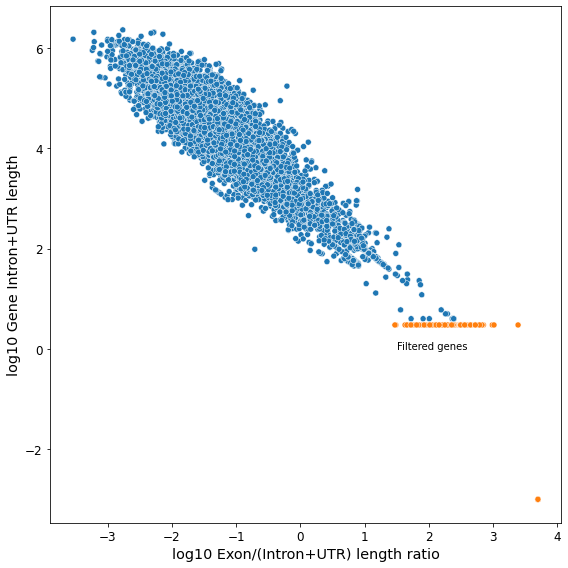

In [69]:
fig, ax = plt.subplots(figsize = (8,8))
axs = sns.scatterplot(x='transformed exon/ncd len ratio', y='transformed ncd len', data=df_ncd_length, hue = 'lowq', ax=ax)
# axs.axvline(x = 1, color = 'red')
# axs.axhline(2, color = 'red')
axs.get_legend().remove()
axs.text(1.5,0,'Filtered genes')
axs.set_ylabel('log10 Gene Intron+UTR length'); axs.set_xlabel('log10 Exon/(Intron+UTR) length ratio')

plt.tight_layout()
# plt.savefig('./figure/ncd_ratio_len_scatter')

### Get the difference of exon/intron length ratio between v38 and v19

In [13]:
import pandas as pd
import os, pickle
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (5, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large',
         'font.family':'DejaVu Sans'}
pylab.rcParams.update(params)

In [47]:
### Transcript info and name dict
dict_transcript_info19 = pickle.load(open('../proc_09152020/dict_transcript_info.pkl','rb'))
dict_name19 = pickle.load(open('../proc_09152020/dict_name.pkl','rb'))

dict_transcript_info38 = pickle.load(open('../proc_09152020/dict_transcript_info_v38.pkl','rb'))
dict_name38 = pickle.load(open('../proc_09152020/dict_name_v38.pkl','rb'))

def get_len_dict(transcript_dict, name_dict):
    #Transcript - [exon/ncd length ration, noncoding length]
    dict_transcript_ncdlen = {}
    for transcripts in transcript_dict:
        length = transcript_dict[transcripts]['transcript']
        length = abs(length[1]-length[0])
        # get exon length
        exon_len = 0
        for x in transcript_dict[transcripts]['CDS']:
            exon_len += abs(x[1]-x[0])
        ncd_len = length-exon_len
        if ncd_len == 0:
            exon_ncd_ratio = 5000
        else:
            exon_ncd_ratio = exon_len/ncd_len
        dict_transcript_ncdlen[transcripts] = [exon_ncd_ratio,ncd_len]
    # Gene name - [exon/ncd length ration, noncoding length]
    dict_name_ncdlen = {}
    for transcripts in transcript_dict:
        name = name_dict[transcripts]
        dict_name_ncdlen[name] = dict_transcript_ncdlen[transcripts]
    return dict_name_ncdlen

dict_ncdlen19 = get_len_dict(dict_transcript_info19, dict_name19)
dict_ncdlen38 = get_len_dict(dict_transcript_info38, dict_name38)

In [48]:
df_change = pd.DataFrame(index = dict_ncdlen19.keys(), columns = ['v19', 'len v19','v38','len v38' ,'change','len change'])
lgene_notin38 = []
for gene, value in dict_ncdlen19.items():
    try:
        ratio19 = float(value[0])
        len19 = float(value[1])
        ratio38 = float(dict_ncdlen38[gene][0])
        len38 = float(dict_ncdlen38[gene][1])
        change = ratio38-ratio19
        lenchange = abs(len38-len19)
        df_change.loc[gene,:] = [ratio19, len19, ratio38,len38, change,lenchange]
    except KeyError:
        lgene_notin38.append(gene)

In [49]:
# Transform v19 exon/intron len ratio
df_change['transformed v19'] = np.log10(df_change['v19'].astype(float))
df_change['transformed change'] = abs(df_change['change'])
df_change.loc[df_change['transformed change']== 0, 'transformed change'] = 0.001
df_change['transformed change'] = np.log10(df_change['transformed change'].astype(float))

df_change.loc[df_change['len v19'] == 0, 'len v19'] = 0.001
df_change['transformed len v19'] = np.log10(df_change['len v19'].astype(float))

In [70]:
df_change.loc[l_lowq_gene, 'lowq'] = 'Filtered'
not_lowq = [i for i in df_change.index if i not in l_lowq_gene]
df_change.loc[not_lowq, 'lowq'] = 'Not filtered'
# df_change.loc[lx,'lowq'] = 'low_cov'

In [41]:
lnochange = df_change[(df_change['lowq'] == 'Filtered') &(df_change['len change'] == 0) ].index.tolist()

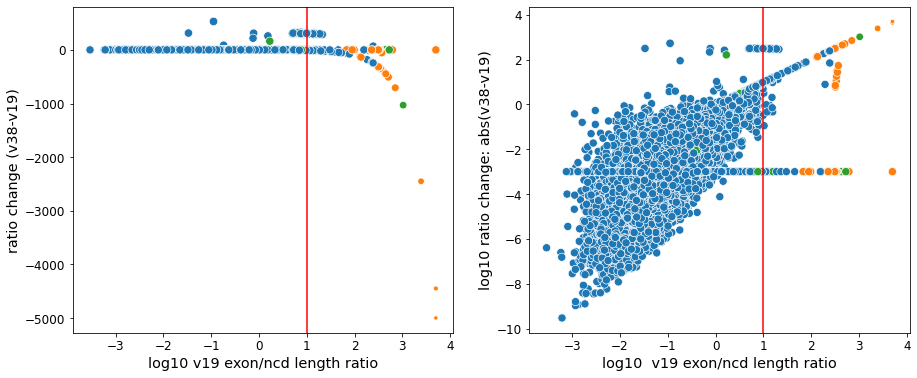

In [62]:
fig, ax = plt.subplots(1,2, figsize = (15,6))
s = df_change['change']
ax[0] = sns.scatterplot(x='transformed v19', y='change', data=df_change, hue = 'lowq',size =s, ax = ax[0])
ax[0].axvline(x = 1, color = 'red')
ax[0].get_legend().remove()
ax[0].set_xlabel('log10 v19 exon/ncd length ratio'); ax[0].set_ylabel('ratio change (v38-v19)')

ax[1] = sns.scatterplot(x='transformed v19', y='transformed change', data=df_change, hue = 'lowq', size =s, ax = ax[1])
ax[1].axvline(x = 1, color = 'red')
# ax[1].axhline(1, color = 'red', linestyle='-.')
ax[1].get_legend().remove()
ax[1].set_xlabel('log10  v19 exon/ncd length ratio'); ax[1].set_ylabel('log10 ratio change: abs(v38-v19)')
plt.savefig('./figure/change_scatter')

In [81]:
df_change.loc['OR1F1']

v19                         155.833
len v19                           6
v38                         155.833
len v38                           6
change                            0
len change                        0
transformed v19             2.19266
transformed change               -3
transformed len v19        0.778151
lowq                   Not filtered
Name: OR1F1, dtype: object

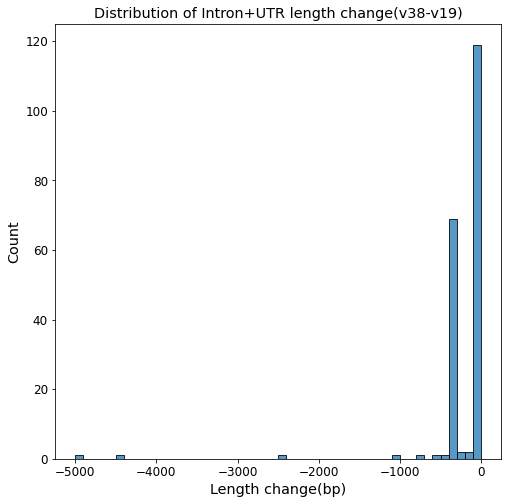

In [74]:
fig, ax = plt.subplots(figsize = (8,8))
ax = sns.histplot(data = df_change[df_change['lowq'] == 'Filtered'], x = 'change',bins = 50)
ax.set_title('Distribution of Intron+UTR length change(v38-v19)')
ax.set_xlabel('Length change(bp)')
plt.savefig('./figure/change_hist')

In [47]:
df_change[df_change['lowq'] == 'Filtered']

,v19,len v19,v38,len v38,change,len change,transformed v19,transformed change,transformed len v19,lowq
OR5D13,313.667,3,313.667,3,0,0,2.496468,-3.000000,0.477121,Filtered
AC096677.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Filtered
OR10K2,311.667,3,0.131839,7092,-311.535,7089,2.493690,2.493507,0.477121,Filtered
OR13C9,317.667,3,317.667,3,0,0,2.501972,-3.000000,0.477121,Filtered
AL358113.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Filtered
...,...,...,...,...,...,...,...,...,...,...
OR7G1,310.667,3,310.667,3,0,0,2.492295,-3.000000,0.477121,Filtered
OR2B6,312.667,3,312.667,3,0,0,2.495082,-3.000000,0.477121,Filtered
MT-CO2,226.667,3,226.667,3,0,0,2.355388,-3.000000,0.477121,Filtered
HUG1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Filtered


In [78]:
print(df_change[df_change['transformed change'] >0.0].shape)
print(len(set(l_lowq_gene).intersection(set(df_change[df_change['transformed change'] >0].index))))

(415, 10)
162


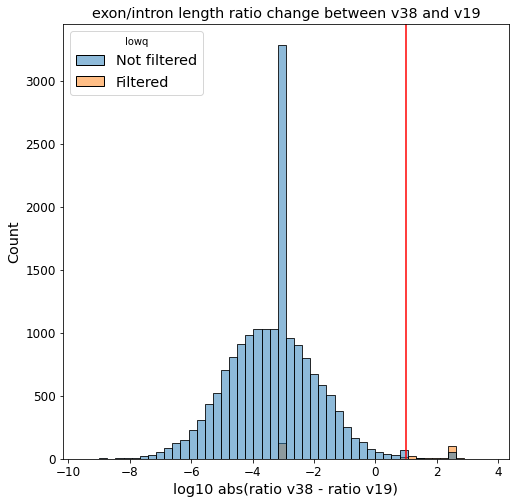

In [75]:
fig, ax = plt.subplots(figsize = (8,8))
ax = sns.histplot(data = df_change, x = 'transformed change', hue = 'lowq', bins = 50)
ax.set_title('exon/intron length ratio change between v38 and v19')
ax.set_xlabel('log10 abs(ratio v38 - ratio v19)')
ax.axvline(x = 1, color = 'red')
plt.savefig('./figure/change_hist')

### Get the noncoding- dist and hit rate of the genes not in covariate file

In [4]:
import pandas as pd
import os
import pickle
import scipy.stats as stats

# Covariate file
f_covariate = '../anno_ref/gene.covariates.converted.txt'
df_covariate = pd.read_csv(f_covariate, sep = '\t')

# Transcript info and name dict to get the gene list of v19 and v38
dict_transcript_info19 = pickle.load(open('../proc_09152020/dict_transcript_info.pkl','rb'))
dict_transcript_info38 = pickle.load(open('../proc_09152020/dict_transcript_info_v38.pkl','rb'))
# gene list of genes in the coverage file
f_cov = '../org_cov_maf/Thy/merged_Thy_102120.txt'
df_cov = pd.read_csv(f_cov, sep = '\t')

In [5]:
lgene_cov = df_cov['gene'].unique()
lgene_19 = set(dict_transcript_info19.keys())
lgene_38 = set(dict_transcript_info38.keys())
lgene_covariate = df_covariate['gene'].unique()

In [6]:
lgene_nothave_cova = []
lgene_have_cova = []
for gene in lgene_cov:
    if gene not in lgene_covariate:
        lgene_nothave_cova.append(gene)
    else:
        lgene_have_cova.append(gene)

In [14]:
len(lgene_nothave_cova)

1586

In [15]:
len(set(l_lowq_gene).intersection(lgene_nothave_cova))

127

In [9]:
df_gene_nothave_cova_ncdlen = pd.DataFrame(index = lgene_nothave_cova,columns =['ncd_ratio', 'ncd_len'] )
for gene in lgene_nothave_cova:
    try:
        df_gene_nothave_cova_ncdlen.loc[gene,:] = dict_name_ncdlen[gene]
    except:
        pass

In [10]:
l_lowq = [i for i in l_lowq_gene if i in df_gene_nothave_cova_ncdlen.index]

In [11]:
df_gene_nothave_cova_ncdlen.loc[df_gene_nothave_cova_ncdlen['ncd_len'] == 0, 'ncd_len'] = 0.001
df_gene_nothave_cova_ncdlen['transformed ncd_len'] = np.log10(df_gene_nothave_cova_ncdlen['ncd_len'].astype(float))
df_gene_nothave_cova_ncdlen.loc[l_lowq, 'lowq'] = 'Filtered'
not_lowq = [i for i in df_gene_nothave_cova_ncdlen.index if i not in l_lowq]
df_gene_nothave_cova_ncdlen.loc[not_lowq, 'lowq'] = 'Not filtered'

In [48]:
# plt.hist([df_gene_nothave_cova_ncdlen['transformed ncd_len'], df_gene_nothave_cova_ncdlen['lowq']],stacked = True,bins=100)

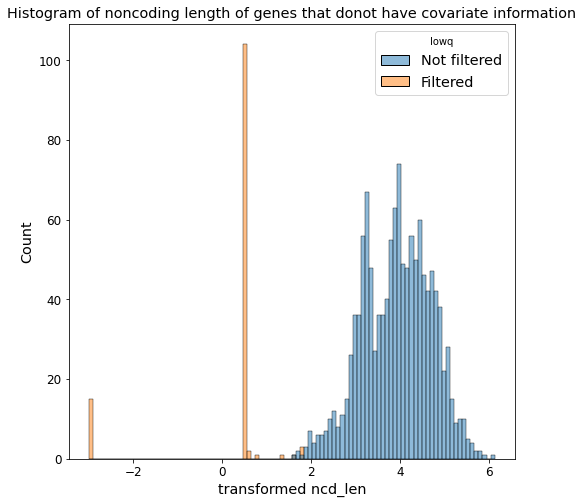

In [105]:
fig,ax = plt.subplots(figsize = (8,8))
sns.histplot(data = df_gene_nothave_cova_ncdlen, x = 'transformed ncd_len', hue = 'lowq', bins = 100)
ax.set_title('Histogram of noncoding length of genes that donot have covariate information')
plt.savefig('./figure/notin_cova_hist')

### Hit rate - Synonymous

In [39]:
# The hit rate of these genes, read the path of all significant files
# In synonymous result
dir_fdr = '../notebook/figure4/FDR_calc'
df_syn_heatmap = pd.read_csv(os.path.join(dir_fdr,'fdr_all_genes.csv'))
df_syn_heatmap = df_syn_heatmap[~df_syn_heatmap['gene'].str.startswith('PCDH')]
df_syn_sig = df_syn_heatmap[df_syn_heatmap['FDR']<0.1]

# All successfully run cohorts
dir_anlyze = '../mutsig_out/anlyze'; feature_type = 'histology'; syn_nsyn ='syn'
sig_pathlist = pickle.load(open(os.path.join(dir_anlyze, feature_type +'.'+syn_nsyn+'.sig_genes.pathlist.060921.pkl'),'rb'))
lcohort = [fpath.split('/')[-1].split('.')[0] for fpath in sig_pathlist]

In [51]:
def get_syn_hits(feature):
    global df_syn_sig, df_sig_hit
    
    dict_syn ={}
    df_synhit = pd.DataFrame(0, index = ['hit','nothit'], columns = ['in_cova','notin_cova'])
    df_sig = df_syn_sig[df_syn_sig['feature'] == feature]
    for gene in df_gene_nothave_cova_ncdlen.index:
        if gene in df_sig['gene'].tolist():
            df_synhit.loc['hit','notin_cova'] +=1
            print(gene)
        else:
            df_synhit.loc['nothit', 'notin_cova'] +=1
    for gene in lgene_have_cova:
        if gene in df_sig['gene'].tolist():
            df_synhit.loc['hit','in_cova'] +=1
        else:
            df_synhit.loc['nothit', 'in_cova'] +=1
    dict_syn[feature] = df_synhit
    return dict_syn

p = Pool(10)
res = p.map(get_syn_hits, lcohort)
p.close()
p.join()

dict_syn = {}
for i in res:
    dict_syn.update(i)

RP11-723O4.6FAM196B

FAM196B
FAM196B
FAM196B


In [45]:
ldf = []
for i in dict_syn:
    ldf.append(dict_syn[i])

for i in range(0,len(dict_syn)-1):
    if i == 0:
        df_add = ldf[i]
        df_to_add = ldf[i+1]
    else:
        df_to_add = ldf[i+1]
        df_add = df_add.add(df_to_add) 
    
oddsratio, pvalue = stats.fisher_exact(df_add)

# import scipy.stats as stats
# df_all = pd.DataFrame()
# for feat, df in dict_syn.items():
#     oddsratio, pvalue = stats.fisher_exact(df)
#     df = pd.concat({feat: df}, names=['Histology'])
#     df.loc[(feat,'hit'),'res'] = f'oddsratio:{oddsratio}'
#     df.loc[(feat,'nothit'),'res'] = f'p-val:{pvalue}'
#     df_all = pd.concat([df_all, df])
print(f'Synonymous: The oddsratio for all histology types is {oddsratio}')
print(f'The pvalue is {pvalue}')
df_add
# df_all.to_csv('./figure/syn_cova_res.csv')

Synonymous: The oddsratio for all histology types is 1.094608031011487
The pvalue is 1.0


,in_cova,notin_cova
hit,61,5
nothit,547926,49161


In [46]:
### The dictionary of cohort - patient number
from collections import Counter
feature_type = 'histology'
dir_cohort = '../anno_ref/cohorts'
df_feat = pd.read_csv(os.path.join(dir_cohort,feature_type+'.csv'))
dict_feat_np = dict(Counter(df_feat[feature_type]))
dict_feat_np = {k: v for k, v in sorted(dict_feat_np.items(), key=lambda item: item[1])}

### Hit rate - nonsynonymous

In [47]:
# The hit rate of these genes, read the path of all significant files
# In nonsynonymous result
dir_anlyze = '../mutsig_out/anlyze'; feature_type = 'histology'; syn_nsyn ='nsyn'
sig_pathlist = pickle.load(open(os.path.join(dir_anlyze, feature_type +'.'+syn_nsyn+'.sig_genes.pathlist.060921.pkl'),'rb'))
df_nsyn_sig = pd.DataFrame()
for fpath in sig_pathlist:
        df_res_feat = pd.read_csv(fpath,sep = '\t')
        df_sig = df_res_feat[df_res_feat['q']<0.1]
        df_sig = df_sig[~df_sig['gene'].str.startswith('PCDH')]
        df_sig['feature'] = fpath.split('/')[-1].split('.')[0]
        df_nsyn_sig = pd.concat([df_nsyn_sig, df_sig])
#         lgene_nsynsig.extend(df_sig['gene'].tolist())
lcohort = [fpath.split('/')[-1].split('.')[0] for fpath in sig_pathlist]

In [50]:
def get_nsyn_hits(feature):
    global df_nsyn_sig
    
    dict_nsyn ={}
    df_nsynhit = pd.DataFrame(0, index = ['hit','nothit'], columns = ['in_cova','notin_cova'])
    df_sig = df_nsyn_sig[df_nsyn_sig['feature'] == feature]

    for gene in df_gene_nothave_cova_ncdlen.index:
        if gene in df_sig['gene'].tolist():
            df_nsynhit.loc['hit','notin_cova'] +=1
            print(gene)
        else:
            df_nsynhit.loc['nothit', 'notin_cova'] +=1

    for gene in lgene_have_cova:
        if gene in df_sig['gene'].tolist():
            df_nsynhit.loc['hit','in_cova'] +=1
        else:
            df_nsynhit.loc['nothit', 'in_cova'] +=1
    
    dict_nsyn[feature] = df_nsynhit
    return dict_nsyn

p = Pool(10)
res = p.map(get_nsyn_hits, lcohort)
p.close()
p.join()

dict_nsyn = {}
for i in res:
    dict_nsyn.update(i)

FAM196B
KMT2D
KMT2D
FAM196B
KMT2C


In [49]:
ldf = []
for i in dict_nsyn:
    ldf.append(dict_nsyn[i])

for i in range(0,len(dict_nsyn)-1):
    if i == 0:
        df_add = ldf[i]
        df_to_add = ldf[i+1]
    else:
        df_to_add = ldf[i+1]
        df_add = df_add.add(df_to_add) 

oddsratio, pvalue = stats.fisher_exact(df_add)

# df_all = pd.DataFrame()
# for feat, df in dict_nsyn.items():
#     oddsratio, pvalue = stats.fisher_exact(df)
#     df = pd.concat({feat: df}, names=['Histology'])
#     df.loc[(feat,'hit'),'res'] = f'oddsratio:{oddsratio}'
#     df.loc[(feat,'nothit'),'res'] = f'p-val:{pvalue}'
#     df_all = pd.concat([df_all, df])
print(f'Non-synonymous: The oddsratio for all histology types is {oddsratio}')
print(f'The pvalue is {pvalue}')
df_add

Non-synonymous: The oddsratio for all histology types is 3.194784313510731
The pvalue is 0.004238680383007572


,in_cova,notin_cova
hit,178,5
nothit,547809,49161


### Neighbor gene set noncoding length of genes

In [1]:
import pandas as pd
import os
import pickle

dir_anlyze = '../mutsig_out/anlyze'; feature_type = 'histology'; syn_nsyn ='syn'
sig_pathlist_syn = pickle.load(open(os.path.join(dir_anlyze, \
                                             feature_type +'.'+syn_nsyn+'.sig_genes.pathlist.060921.pkl'),'rb'))

feature_type = 'histology'; syn_nsyn ='nsyn'
sig_pathlist_nsyn = pickle.load(open(os.path.join(dir_anlyze, \
                                             feature_type +'.'+syn_nsyn+'.sig_genes.pathlist.060921.pkl'),'rb'))
df_ncd = pd.DataFrame.from_dict(dict_name_ncdlen).transpose()
df_ncd.columns = ['ncdlen', 'ratio']



Lymph-BNHL
count    18871.000000
mean         3.804833
std          7.210648
min          0.000000
25%          0.000000
50%          1.000000
75%          4.000000
max         50.000000
Name: nnei, dtype: float64


<ipython-input-118-80c252a3d985>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['histology'] = fpath.split('/')[-1].split('.')[0]


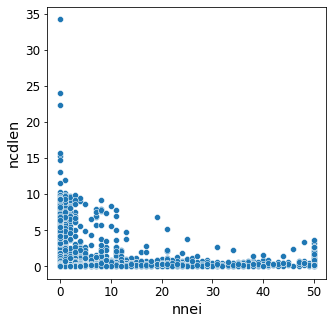

Bone-Osteosarc
count    18871.000000
mean        10.043347
std         13.663572
min          0.000000
25%          1.000000
50%          4.000000
75%         12.000000
max         50.000000
Name: nnei, dtype: float64


<ipython-input-118-80c252a3d985>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['histology'] = fpath.split('/')[-1].split('.')[0]


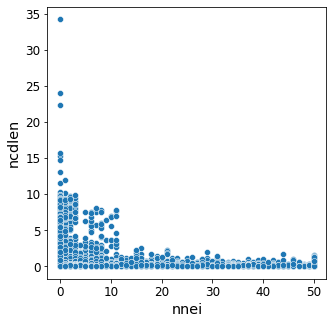

Panc-Endocrine
count    18871.000000
mean         8.576811
std         12.640092
min          0.000000
25%          1.000000
50%          4.000000
75%         10.000000
max         50.000000
Name: nnei, dtype: float64


<ipython-input-118-80c252a3d985>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['histology'] = fpath.split('/')[-1].split('.')[0]


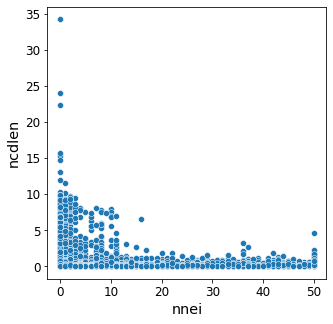

CNS-PiloAstro
count    18871.000000
mean        13.443326
std         16.016719
min          0.000000
25%          2.000000
50%          6.000000
75%         19.000000
max         50.000000
Name: nnei, dtype: float64


<ipython-input-118-80c252a3d985>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['histology'] = fpath.split('/')[-1].split('.')[0]


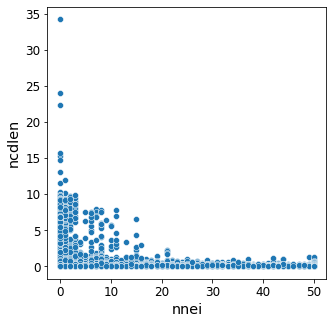

CNS-Oligo
count    18871.000000
mean        11.092523
std         14.013360
min          0.000000
25%          1.000000
50%          5.000000
75%         15.000000
max         50.000000
Name: nnei, dtype: float64


<ipython-input-118-80c252a3d985>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['histology'] = fpath.split('/')[-1].split('.')[0]


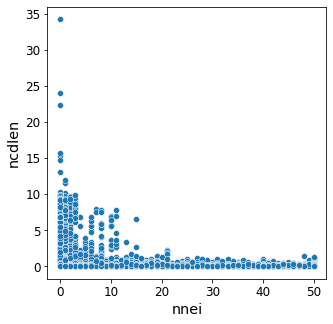

Myeloid-AML
count    18871.000000
mean        13.295904
std         15.801169
min          0.000000
25%          2.000000
50%          6.000000
75%         19.000000
max         50.000000
Name: nnei, dtype: float64


<ipython-input-118-80c252a3d985>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['histology'] = fpath.split('/')[-1].split('.')[0]


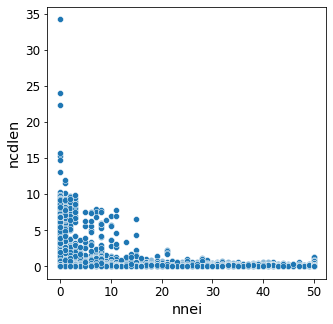

Skin-Melanoma
count    18871.000000
mean         0.678024
std          1.726438
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         50.000000
Name: nnei, dtype: float64


<ipython-input-118-80c252a3d985>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['histology'] = fpath.split('/')[-1].split('.')[0]


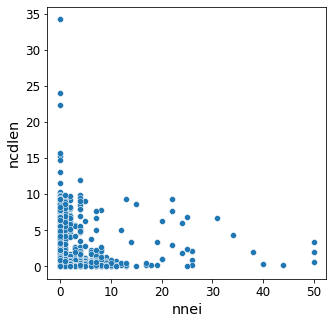

CNS-Medullo
count    18871.000000
mean         8.177574
std         12.228673
min          0.000000
25%          1.000000
50%          4.000000
75%          9.000000
max         50.000000
Name: nnei, dtype: float64


<ipython-input-118-80c252a3d985>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['histology'] = fpath.split('/')[-1].split('.')[0]


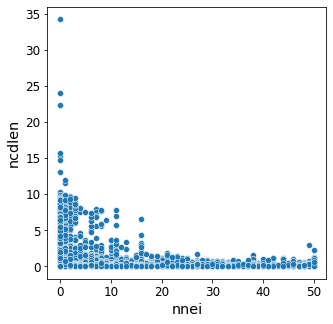

SoftTissue-Liposarc
count    18871.000000
mean         9.782153
std         12.963504
min          0.000000
25%          1.000000
50%          4.000000
75%         13.000000
max         50.000000
Name: nnei, dtype: float64


<ipython-input-118-80c252a3d985>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['histology'] = fpath.split('/')[-1].split('.')[0]


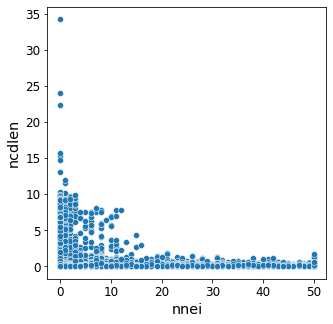

SoftTissue-Leiomyo
count    18871.000000
mean        11.082878
std         14.214349
min          0.000000
25%          1.000000
50%          5.000000
75%         14.000000
max         50.000000
Name: nnei, dtype: float64


<ipython-input-118-80c252a3d985>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['histology'] = fpath.split('/')[-1].split('.')[0]


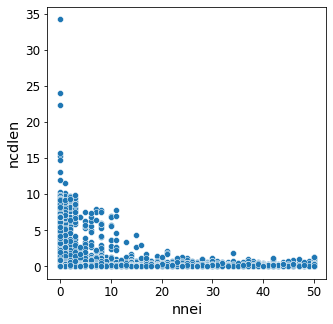

Biliary-AdenoCA
count    18871.000000
mean         5.063961
std          9.035664
min          0.000000
25%          0.000000
50%          2.000000
75%          5.000000
max         50.000000
Name: nnei, dtype: float64


<ipython-input-118-80c252a3d985>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['histology'] = fpath.split('/')[-1].split('.')[0]


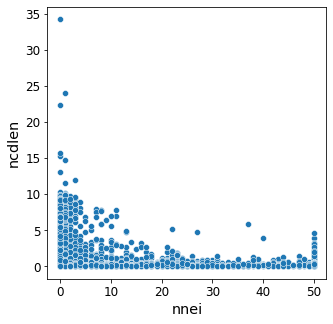

Kidney-ChRCC
count    18871.000000
mean        10.742833
std         14.265179
min          0.000000
25%          1.000000
50%          4.000000
75%         14.000000
max         50.000000
Name: nnei, dtype: float64


<ipython-input-118-80c252a3d985>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['histology'] = fpath.split('/')[-1].split('.')[0]


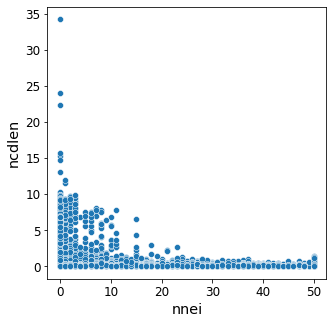

Lymph-CLL
count    18871.000000
mean         9.703301
std         13.100807
min          0.000000
25%          1.000000
50%          4.000000
75%         13.000000
max         50.000000
Name: nnei, dtype: float64


<ipython-input-118-80c252a3d985>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['histology'] = fpath.split('/')[-1].split('.')[0]


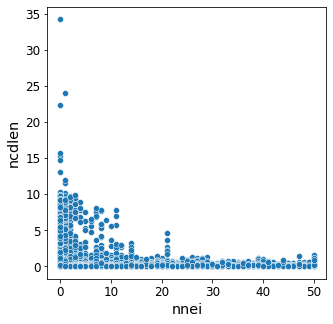

Lung-SCC
count    18871.000000
mean         2.904828
std          6.445496
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max         50.000000
Name: nnei, dtype: float64


<ipython-input-118-80c252a3d985>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['histology'] = fpath.split('/')[-1].split('.')[0]


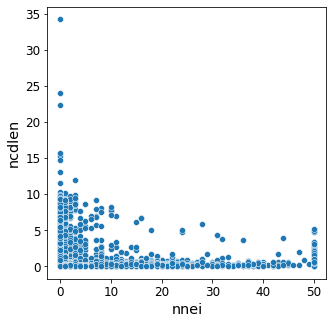

Breast-LobularCA
count    18871.000000
mean        10.695353
std         14.665566
min          0.000000
25%          1.000000
50%          4.000000
75%         14.000000
max         50.000000
Name: nnei, dtype: float64


<ipython-input-118-80c252a3d985>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['histology'] = fpath.split('/')[-1].split('.')[0]


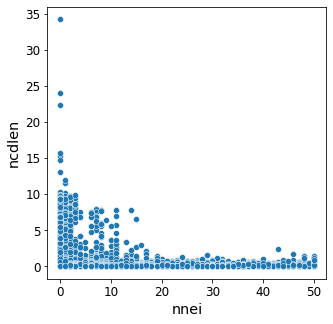

Eso-AdenoCA
count    18871.000000
mean         2.997297
std          6.350322
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max         50.000000
Name: nnei, dtype: float64


<ipython-input-118-80c252a3d985>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['histology'] = fpath.split('/')[-1].split('.')[0]


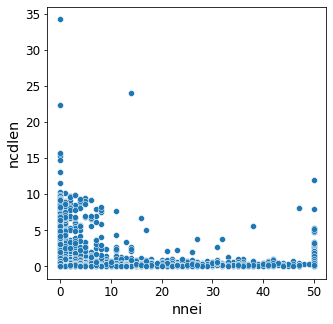

Kidney-RCC
count    18871.000000
mean         3.996609
std          7.193443
min          0.000000
25%          0.000000
50%          2.000000
75%          4.000000
max         50.000000
Name: nnei, dtype: float64


<ipython-input-118-80c252a3d985>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['histology'] = fpath.split('/')[-1].split('.')[0]


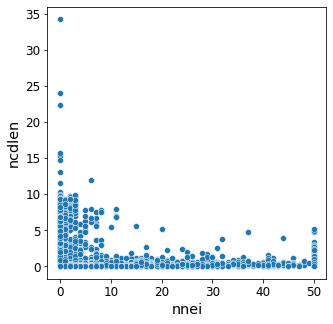

Thy-AdenoCA
count    18871.000000
mean        11.677601
std         14.763604
min          0.000000
25%          1.000000
50%          5.000000
75%         16.000000
max         50.000000
Name: nnei, dtype: float64


<ipython-input-118-80c252a3d985>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['histology'] = fpath.split('/')[-1].split('.')[0]


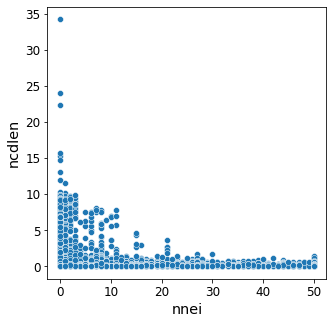

<ipython-input-118-80c252a3d985>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['histology'] = fpath.split('/')[-1].split('.')[0]


Panc-AdenoCA
count    18871.000000
mean         2.964284
std          6.142686
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max         50.000000
Name: nnei, dtype: float64


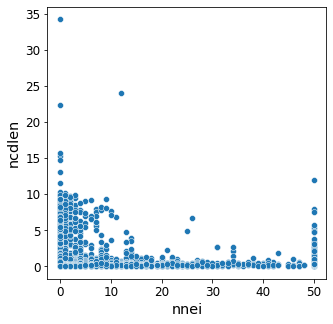

Lung-AdenoCA
count    18871.000000
mean         3.771501
std          7.487544
min          0.000000
25%          0.000000
50%          1.000000
75%          4.000000
max         50.000000
Name: nnei, dtype: float64


<ipython-input-118-80c252a3d985>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['histology'] = fpath.split('/')[-1].split('.')[0]


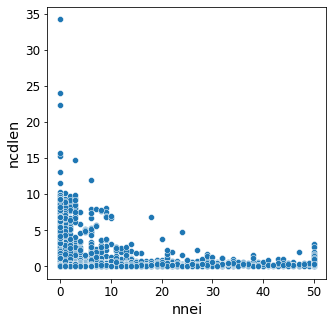

Liver-HCC
count    18871.000000
mean         1.854645
std          4.188550
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max         50.000000
Name: nnei, dtype: float64


<ipython-input-118-80c252a3d985>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['histology'] = fpath.split('/')[-1].split('.')[0]


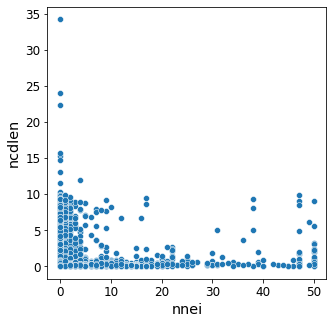

Uterus-AdenoCA
count    18871.000000
mean         3.796301
std          7.220646
min          0.000000
25%          0.000000
50%          1.000000
75%          4.000000
max         50.000000
Name: nnei, dtype: float64


<ipython-input-118-80c252a3d985>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['histology'] = fpath.split('/')[-1].split('.')[0]


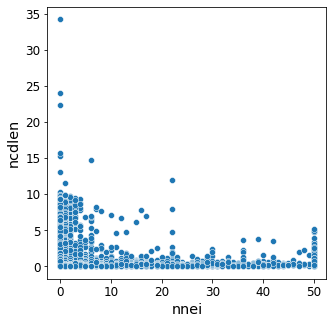

Head-SCC
count    18871.000000
mean         4.758677
std          8.549730
min          0.000000
25%          0.000000
50%          2.000000
75%          5.000000
max         50.000000
Name: nnei, dtype: float64


<ipython-input-118-80c252a3d985>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['histology'] = fpath.split('/')[-1].split('.')[0]


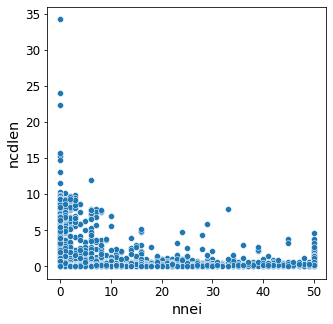

CNS-GBM
count    18871.000000
mean         5.358010
std          9.184551
min          0.000000
25%          0.000000
50%          2.000000
75%          6.000000
max         50.000000
Name: nnei, dtype: float64


<ipython-input-118-80c252a3d985>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['histology'] = fpath.split('/')[-1].split('.')[0]


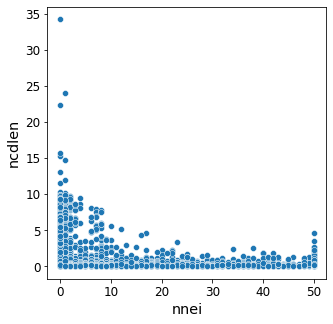

Cervix-SCC
count    18871.000000
mean         9.772349
std         13.270896
min          0.000000
25%          1.000000
50%          4.000000
75%         12.000000
max         50.000000
Name: nnei, dtype: float64


<ipython-input-118-80c252a3d985>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['histology'] = fpath.split('/')[-1].split('.')[0]


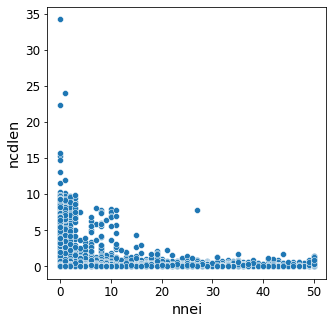

Bladder-TCC
count    18871.000000
mean         5.235971
std          9.035026
min          0.000000
25%          0.000000
50%          2.000000
75%          6.000000
max         50.000000
Name: nnei, dtype: float64


<ipython-input-118-80c252a3d985>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['histology'] = fpath.split('/')[-1].split('.')[0]


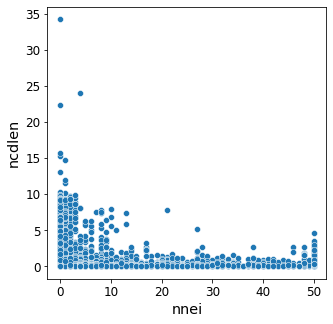

ColoRect-AdenoCA
count    18871.000000
mean         0.993853
std          2.436293
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         50.000000
Name: nnei, dtype: float64


<ipython-input-118-80c252a3d985>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['histology'] = fpath.split('/')[-1].split('.')[0]


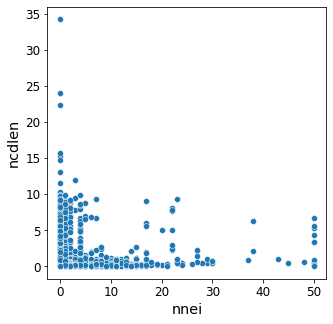

Myeloid-MPN
count    18871.000000
mean        13.733506
std         16.166805
min          0.000000
25%          2.000000
50%          7.000000
75%         20.000000
max         50.000000
Name: nnei, dtype: float64


<ipython-input-118-80c252a3d985>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['histology'] = fpath.split('/')[-1].split('.')[0]


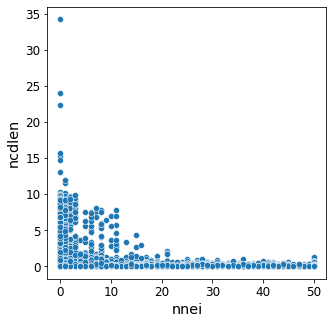

Ovary-AdenoCA
count    18871.000000
mean         3.734566
std          7.271287
min          0.000000
25%          0.000000
50%          1.000000
75%          4.000000
max         50.000000
Name: nnei, dtype: float64


<ipython-input-118-80c252a3d985>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['histology'] = fpath.split('/')[-1].split('.')[0]


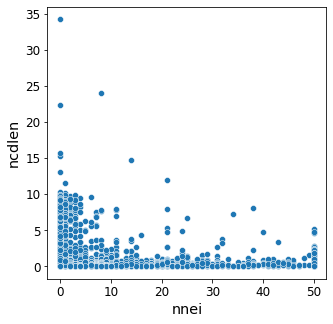

Stomach-AdenoCA
count    18871.00000
mean         3.32542
std          6.37918
min          0.00000
25%          0.00000
50%          1.00000
75%          4.00000
max         50.00000
Name: nnei, dtype: float64


<ipython-input-118-80c252a3d985>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['histology'] = fpath.split('/')[-1].split('.')[0]


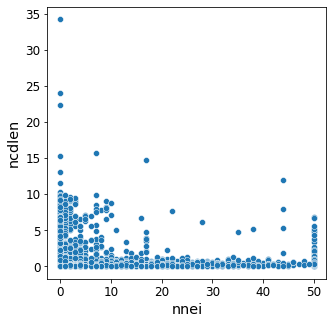

Breast-AdenoCA
count    18871.000000
mean         2.690954
std          5.392155
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max         50.000000
Name: nnei, dtype: float64


<ipython-input-118-80c252a3d985>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['histology'] = fpath.split('/')[-1].split('.')[0]


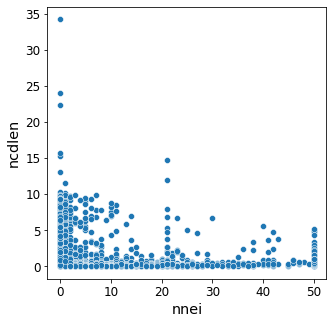

Prost-AdenoCA
count    18871.000000
mean         5.934185
std         10.442317
min          0.000000
25%          0.000000
50%          2.000000
75%          6.000000
max         50.000000
Name: nnei, dtype: float64


<ipython-input-118-80c252a3d985>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['histology'] = fpath.split('/')[-1].split('.')[0]


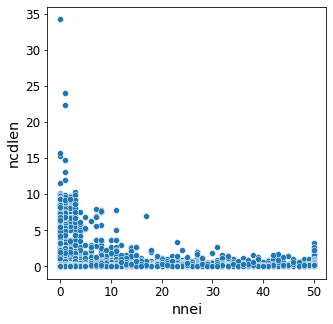

In [118]:
df_nnei = pd.DataFrame()
for fpath in sig_pathlist_syn:
        df_res_feat = pd.read_csv(fpath,sep = '\t')
        df_temp = df_res_feat[['gene','nnei']]; 
        df_temp['histology'] = fpath.split('/')[-1].split('.')[0]
        df_temp = df_temp.set_index('gene')
        df_temp = pd.concat([df_temp, df_ncd], axis = 1)
        sns.scatterplot(x = 'nnei', y= 'ncdlen', data = df_temp)
        print(fpath.split('/')[-1].split('.')[0])
        print(df_temp['nnei'].describe())
        plt.show()
        
#         df_temp = df_temp.set_index('histology')
        df_nnei = pd.concat([df_nnei, df_temp],ignore_index = False)
        
#         df_sig = df_res_feat[df_res_feat['q']<0.1]
#         lgene_nsynsig.extend(df_sig['gene'].tolist())

In [52]:
df_nnei = df_nnei.set_index('histology', append = True)

In [63]:
df_nnei.sum(level = 0)

,nnei,ncdlen,ratio
BCL2,87.0,0.116695,6274144.0
HIST1H2BK,30.0,1.476803,261408.0
NOL9,449.0,2.155014,995008.0
PCDHA4,57.0,0.448717,6474208.0
SRSF2,591.0,8.154202,83008.0
...,...,...,...
RUNX3,0.0,0.638326,2054976.0
HUG1,0.0,11573.333333,96.0
DUX4L2,0.0,287.209877,5184.0
ZRSR1,0.0,1094.095238,1344.0


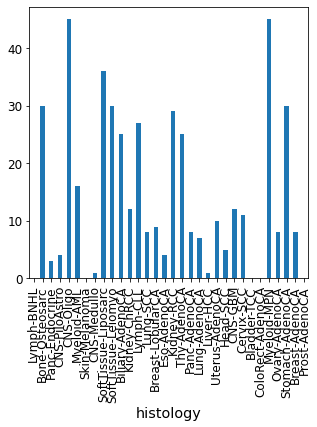

In [111]:
df_lymph = df_nnei[df_nnei['histology'] == 'Lymph-BNHL']
# df_nnei = df_nnei.set_index('histology', append = True)
df_nnei.loc['NOL9',:]['nnei'].plot.bar()

In [113]:
df_lymph = df_nnei[df_nnei['histology'] == 'Lymph-BNHL']


In [116]:
df_lymph['nnei'].describe()

count    18871.000000
mean         3.804833
std          7.210648
min          0.000000
25%          0.000000
50%          1.000000
75%          4.000000
max         50.000000
Name: nnei, dtype: float64

### Check gene mutation number and coverage 

In [4]:
dir_cov = '../cov_out/cov_cohorts_060121'
dir_maf = '../maf_out/maf_cohorts_060121'

In [5]:
dir_cohorts = '../anno_ref/cohorts/'
feature_type = 'histology'
lfeat = []
with open(os.path.join(dir_cohorts,feature_type+'.csv')) as f:
    next(f)
    for lines in f:
        lfeat.append(lines.split(',')[-1].strip('\n'))
lfeat = list(set(lfeat))

In [6]:
feat = 'ColoRect-AdenoCA'

In [8]:
maf = os.path.join(dir_maf, feature_type,feat+'.csv')
# cov = os.path.join(dir_cov, feature_type,feat+'.csv')

In [9]:
df_maf = pd.read_csv(maf, sep = '\t')

/opt/aci/sw/anaconda3/2020.07_gcc-4.8.5-khh/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (1,3,17,24,28,30,33,34,35,36,40) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [10]:
df_maf['Variant_Classification'].unique()

array(['lincRNA', "5'Flank", 'Intron', 'IGR', 'RNA', 'Silent', "3'UTR",
       'Missense_Mutation', "5'UTR", 'Nonsense_Mutation', 'Splice_Site',
       'De_novo_Start_OutOfFrame', 'De_novo_Start_InFrame',
       'Start_Codon_SNP', 'Nonstop_Mutation', 'Frame_Shift_Del',
       'Frame_Shift_Ins', 'In_Frame_Del', 'In_Frame_Ins',
       'Stop_Codon_Ins', 'SNP'], dtype=object)

In [101]:
df_maf[df_maf['Hugo_Symbol'] == 'CCDC168'].to_csv('CCDC168.csv')

In [99]:
for k,v in dict_name.items():
    if v == 'CCDC168':
        print(k)

ENST00000322527


In [100]:
dict_transcript_info['ENST00000322527']

{'UTR': [[103381801, 103381803]],
 'chr': 'chr13',
 'exon': [[103381801, 103389159]],
 'CDS': [[103381804, 103389159]],
 'transcript': [103381801, 103389159],
 'strand': '-'}